## Sistem Deteksi Serangan Pada Jaringan
#### dataset NSL-KDD:

### Persiapkan lingkungan kerja
- Selain itu, pastikan Anda telah mengunduh dataset NSL-KDD dan mempersiapkannya untuk analisis data.
- dataset NSL-KDD dari situs resminya di http://www.unb.ca/cic/datasets/nsl.html. 
- Setelah diunduh, dataset terdiri dari beberapa file yang perlu diekstrak sebelum dapat digunakan. File-file tersebut terdiri dari:

1. KDDTrain+.txt: File ini digunakan untuk melatih model deteksi intrusi.
2. KDDTest+.txt: File ini digunakan untuk menguji model deteksi intrusi yang telah dilatih.
3. KDDTrain+.arff: File ini adalah file KDDTrain+.txt yang telah diubah ke format ARFF.
4. KDDTest+.arff: File ini adalah file KDDTest+.txt yang telah diubah ke format ARFF.
5. index.html: File ini adalah file dokumentasi untuk dataset NSL-KDD

### Load dataset ke dalam DataFrame Pandas
- Gunakan Pandas untuk memuat dataset NSL-KDD ke dalam DataFrame Pandas.
- Pastikan untuk menentukan nama kolom untuk setiap atribut pada dataset.

### Mengimpor Library dan Dataset
- Library yang dibutuhkan adalah Pandas, Numpy, Scikit-learn, dan Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import dataset NSL-KDD
df = pd.read_csv("./NSL-KDD/KDDTrain+.txt")
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
# install modul terlebih dahulu
# pip install liac-arff
import arff

with open('./NSL-KDD/KDDTrain+.arff', 'r') as f:
    data = arff.load(f)
    
print(data)

In [2]:
# import NSL-KDD dataset
cols = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", 
        "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
        "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
        "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
        "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]

dataset = pd.read_csv("./NSL-KDD/KDDTrain+.txt", names=cols)
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
dataset.info()

In [ ]:
dataset.columns

In [ ]:
dataset.shape

### Pra-pemrosesan data
- Sebelum membangun model, perlu dilakukan pra-pemrosesan data pada dataset. 
- Pra-pemrosesan data meliputi penghilangan missing values, encoding kategori, dan normalisasi data.

In [3]:
# Cek Missing Value
pd.isna(dataset).sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [4]:
# cek Outlier
import scipy.stats as stats
print(dataset['src_bytes'].describe())

count    1.259730e+05
mean     4.556674e+04
std      5.870331e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.760000e+02
max      1.379964e+09
Name: src_bytes, dtype: float64


In [5]:
# Dengan Menggunakan Inter Quartil Rate
q1 = dataset["src_bytes"].quantile(0.25)
q3 = dataset["src_bytes"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

dataset.loc[(dataset["src_bytes"] < fence_low) | (dataset["src_bytes"] > fence_high)].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
42,2,tcp,smtp,SF,1591,372,0,0,0,0,...,0.81,0.02,0.01,0.00,0.00,0.00,0.0,0.00,normal,21
65,0,tcp,smtp,SF,696,333,0,0,0,0,...,0.39,0.04,0.01,0.02,0.00,0.00,0.0,0.00,normal,21
95,2,tcp,smtp,SF,3065,331,0,0,0,0,...,0.48,0.02,0.00,0.02,0.01,0.02,0.0,0.00,normal,21
111,0,tcp,smtp,SF,2089,335,0,0,0,0,...,0.60,0.03,0.00,0.00,0.01,0.02,0.0,0.01,normal,20
127,1,tcp,smtp,SF,1079,334,0,0,0,0,...,0.57,0.03,0.01,0.01,0.00,0.00,0.0,0.00,normal,21


In [6]:
dataset.duplicated().sum()

0

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
# menghapus baris yang mengandung missing values
# dataset.dropna(inplace=True)

# melakukan one-hot encoding pada kategori
dataset = pd.get_dummies(dataset, columns=['protocol_type', 'service', 'flag'])

# membagi dataset menjadi fitur dan label
X = dataset.drop('label', axis=1)
y = dataset['label']

# membagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# melakukan normalisasi data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dataset.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Membangun model decision tree
- Setelah pra-pemrosesan data selesai dilakukan, Anda dapat mulai membangun model decision tree. 
- gunakan library scikit-learn untuk membangun model decision tree.

In [8]:
# membangun model decision tree dengan criterion "entropy"
dtree = DecisionTreeClassifier(criterion='entropy')

### Melatih model decision tree
- Setelah membangun model decision tree, selanjutnya adalah melatih model tersebut pada train set.

In [9]:
# melatih model decision tree pada train set
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Memprediksi label pada test set
- Setelah model decision tree dilatih pada train set, selanjutnya adalah menggunakan model tersebut untuk memprediksi label pada test set. Berikut adalah contoh kode untuk memprediksi label pada test set:


In [11]:
# memprediksi label pada test set
y_pred = dtree.predict(X_test)
y_pred

array(['normal', 'neptune', 'neptune', ..., 'normal', 'normal', 'neptune'],
      dtype=object)

### Evaluasi model decision tree
Setelah memprediksi label pada test set, selanjutnya adalah mengevaluasi performa model decision tree dengan menggunakan berbagai metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Berikut adalah contoh kode untuk mengevaluasi model decision tree:

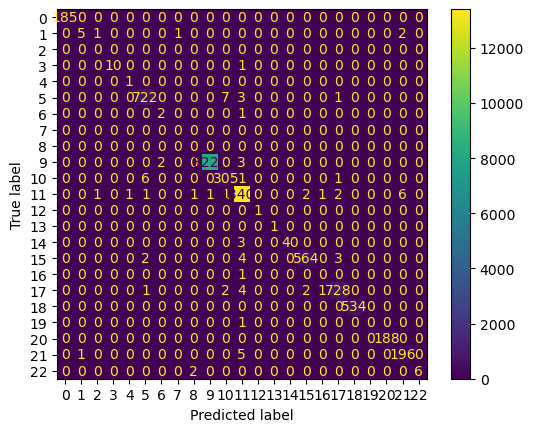

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9968644572335781


In [14]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_test, y_pred, zero_division=1))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       0.83      0.56      0.67         9
      ftp_write       0.00      1.00      0.00         0
   guess_passwd       1.00      0.91      0.95        11
           imap       0.50      1.00      0.67         1
        ipsweep       0.99      0.98      0.99       733
           land       0.50      0.67      0.57         3
     loadmodule       0.00      1.00      0.00         0
       multihop       0.00      1.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.97      0.97      0.97       313
         normal       1.00      1.00      1.00     13422
           perl       1.00      1.00      1.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       0.99      0.98      0.99       573
        rootkit       0.00    

#### penjelasan dari metrik evaluasi yang umum digunakan:

1. Accuracy: merupakan proporsi jumlah data yang diprediksi dengan benar terhadap total jumlah data yang ada.
- Metrik ini berguna ketika jumlah data yang diprediksi dengan benar dan salah memiliki bobot yang sama pentingnya.
- Namun, akurasi dapat memberikan hasil yang salah ketika terdapat ketidakseimbangan kelas (imbalance class).
2. Precision: merupakan proporsi dari data yang diprediksi positif yang benar-benar positif.
- Precision berguna untuk meminimalkan false positive, yaitu kasus ketika model memprediksi suatu kelas sebagai positif padahal seharusnya negatif.
3. Recall: merupakan proporsi dari data positif yang berhasil diprediksi dengan benar dari total jumlah data positif.
- Recall berguna untuk meminimalkan false negative, yaitu kasus ketika model memprediksi suatu kelas sebagai negatif padahal seharusnya positif.
4. F1 Score: merupakan harmonic mean dari precision dan recall, dan berguna untuk mengevaluasi model secara keseluruhan.
- F1 score adalah cara yang baik untuk menggabungkan precision dan recall jika ingin memperhatikan kedua metrik tersebut secara seimbang.
- Dalam praktiknya, untuk memilih metrik evaluasi yang tepat tergantung pada kasus yang dihadapi. Jika kelas-kelas pada dataset tidak seimbang (imbalance class), maka metrik evaluasi seperti precision, recall, dan F1 score lebih baik digunakan daripada accuracy.

- Metrik evaluasi yang ditampilkan adalah precision, recall, f1-score, dan support untuk kelas "back". Setiap metrik memberikan informasi yang berbeda tentang kinerja model untuk kelas tersebut.

1. Precision mengukur proporsi true positive yang diidentifikasi dengan benar dari semua hasil prediksi positif. Dalam hal ini, precision untuk kelas "back" adalah 0.99, yang berarti dari semua hasil prediksi positif untuk kelas "back", 99% adalah benar.

2. Recall mengukur proporsi true positive yang diidentifikasi dengan benar dari semua instance yang sebenarnya positif. Recall untuk kelas "back" adalah 1.00, yang berarti bahwa dari semua instance yang sebenarnya termasuk kelas "back", 100% diidentifikasi dengan benar.

3. F1-score adalah rata-rata harmonik dari precision dan recall. F1-score memberikan perbandingan yang lebih baik antara precision dan recall daripada akurasi. F1-score untuk kelas "back" adalah 0.99, yang merupakan rata-rata harmonik dari precision dan recall.

4. Support adalah jumlah instance dari kelas "back" dalam data uji. Support untuk kelas "back" adalah 185.

### Menampilkan gambar dari pohon keputusan (decision tree) yang dihasilkan oleh model pada dataset NSL-KDD:

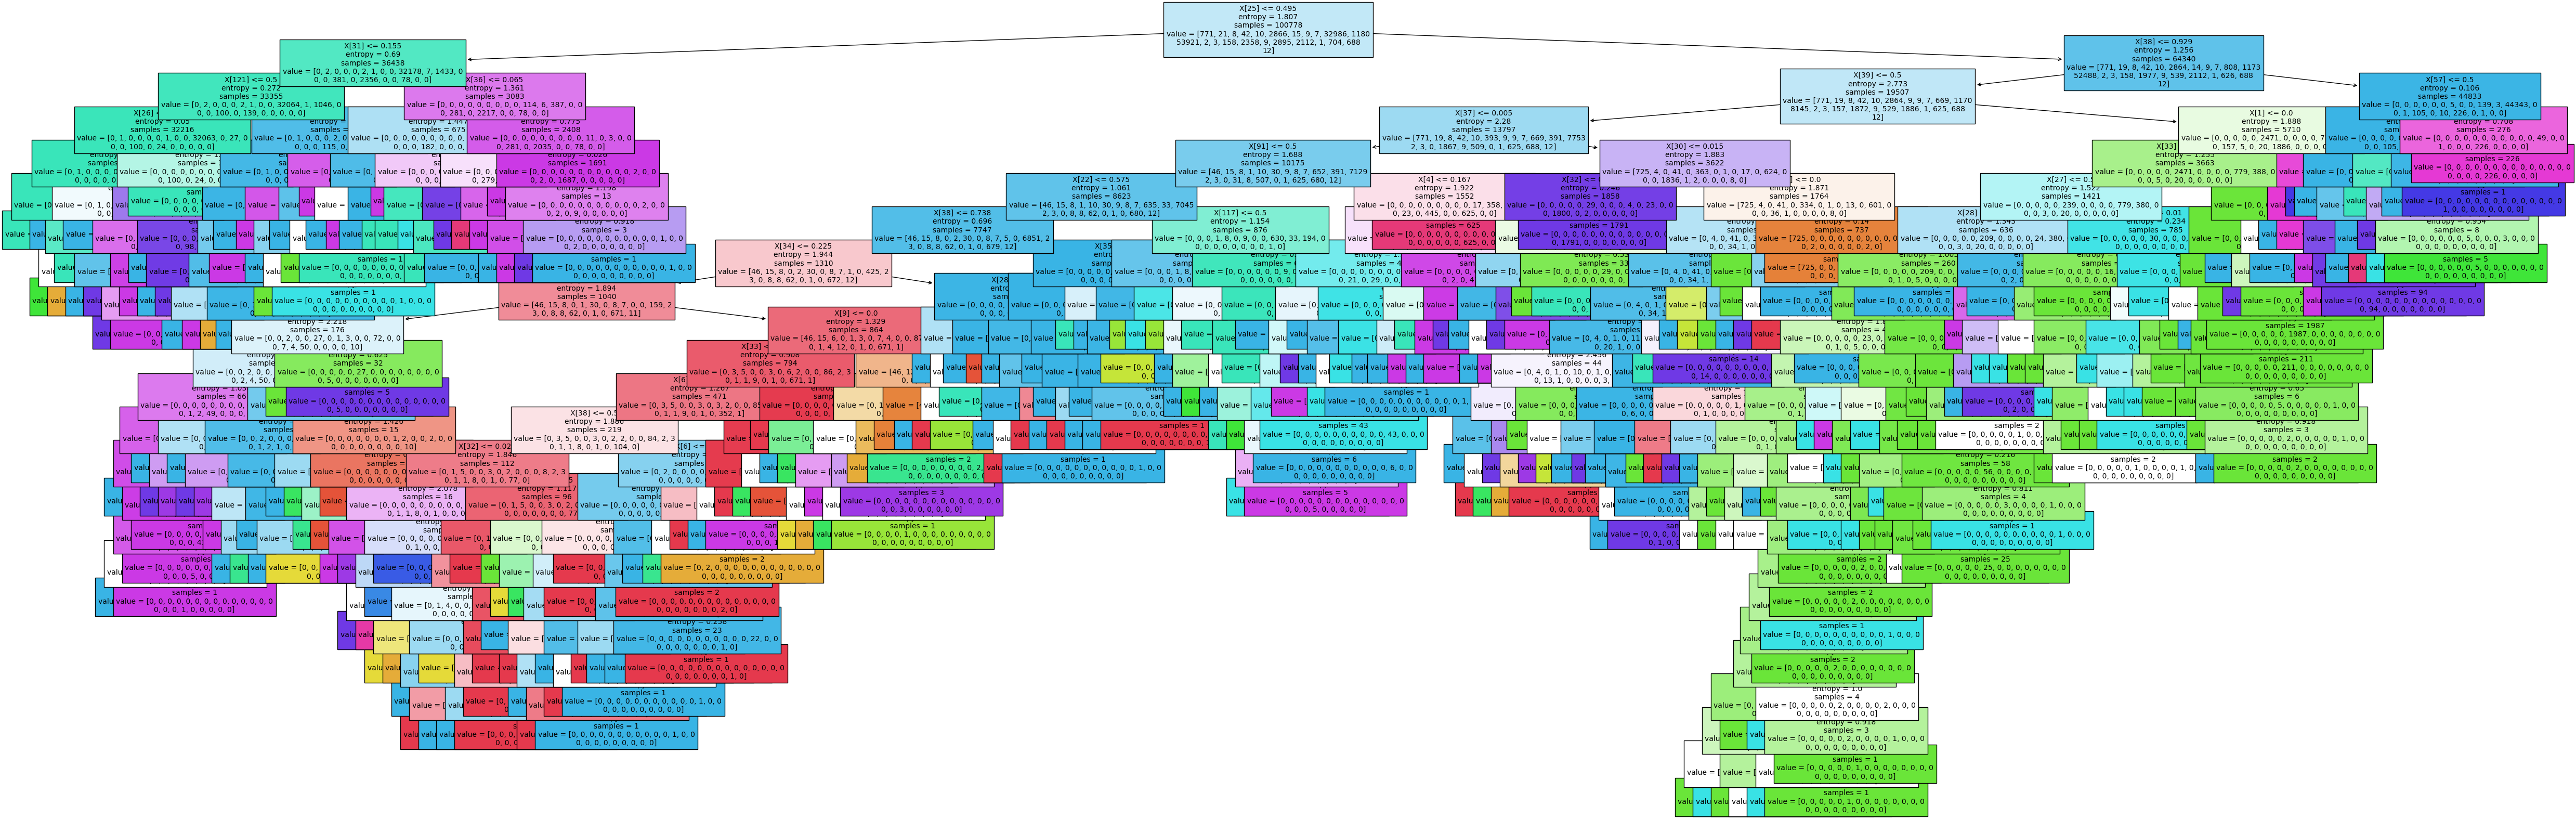

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,20))
plot_tree(dtree, filled=True, fontsize=10)
plt.show()

In [ ]:
# install modul graphviz
# melalui cmd pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
feature_cols = X.columns
dot_data = export_graphviz(dtree, out_file=None, filled=True, 
                           feature_names=feature_cols,
                           special_characters=True)


graph = graphviz.Source(dot_data)
graph.render("dtree_render", format="png", directory='./NSL-KDD/d3.png')
graph


# Pengujian  Model
- Untuk melakukan pengujian pada model, kita dapat menggunakan data yang belum pernah dilihat oleh model sebelumnya (data testing).

## Mempersiapkan dataset testing:
- Membaca file datatest.txt dan memuatnya ke dalam suatu variabel. Anda dapat menggunakan library pandas untuk membaca file teks.
- Mengubah nama kolom pada DataFrame sesuai dengan nama kolom pada data pelatihan. Anda dapat menggunakan list comprehension untuk membuat daftar nama kolom baru.

In [19]:
import pandas as pd

# Baca file datatest.txt dan simpan ke dalam DataFrame
df_test = pd.read_csv('./NSL-KDD/KDDTest+.txt', header=None)
# Buat daftar nama kolom baru
# Buat daftar nama kolom baru
new_cols = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
            "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
            "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
            "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
            "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
            "dst_host_srv_rerror_rate", "label", "difficulty"]

# Ubah nama kolom pada DataFrame
df_test.columns = new_cols

df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


#### Menghilangkan kolom "attack_type" dari DataFrame karena kolom tersebut tidak digunakan pada saat pengujian.

In [20]:
# Hapus kolom "attack_type" dari DataFrame
df_test.drop('label', axis=1, inplace=True)

In [21]:
print(df_test.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'difficulty'],
      dtype='object')


#### Mengubah nama kolom
- Mengubah nama kolom pada DataFrame sesuai dengan nama kolom pada data pelatihan. Anda dapat menggunakan list comprehension untuk membuat daftar nama kolom baru.

In [22]:
# Ganti nilai "?" pada kolom "protocol_type" dengan "tcp"
df_test.loc[df_test['protocol_type'] == '?', 'protocol_type'] = 'tcp'

# Ganti nilai "?" pada kolom "service" dengan "http"
df_test.loc[df_test['service'] == '?', 'service'] = 'http'

# Ganti nilai "?" pada kolom "flag" dengan "SF"
df_test.loc[df_test['flag'] == '?', 'flag'] = 'SF'


# Ubah tipe data kolom-kolom kategorikal menjadi kategori
cat_cols = ['protocol_type', 'service', 'flag']
df_test[cat_cols] = df_test[cat_cols].astype('category')


In [23]:
# Ubah tipe data kolom-kolom kategorikal menjadi kategori
cat_cols = ['protocol_type', 'service', 'flag']
df_test[cat_cols] = df_test[cat_cols].astype('category')

### Pengujian Model
Setelah data testing sudah siap, langkah selanjutnya adalah melakukan pengujian model dengan menggunakan data tersebut. Berikut ini adalah langkah-langkah untuk melakukan pengujian model:

Load model yang sudah dilatih sebelumnya dengan menggunakan fungsi load() dari library joblib, seperti pada contoh di bawah ini:

In [24]:
import joblib

# Menyimpan model dtree ke dalam file 'dtree_model.joblib'
joblib.dump(dtree, 'dtree_model.joblib')



['dtree_model.joblib']

In [25]:
import joblib

# Memuat kembali model dtree dari file 'dtree_model.joblib'
dtree = joblib.load('dtree_model.joblib')


In [26]:
import joblib

# Memuat kembali model dtree dari file 'dtree_model.joblib'
dtree = joblib.load('dtree_model.joblib')


In [27]:
y_pred = dtree.predict(X_test)


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       0.83      0.56      0.67         9
      ftp_write       0.00      0.00      0.00         0
   guess_passwd       1.00      0.91      0.95        11
           imap       0.50      1.00      0.67         1
        ipsweep       0.99      0.98      0.99       733
           land       0.50      0.67      0.57         3
     loadmodule       0.00      0.00      0.00         0
       multihop       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.97      0.97      0.97       313
         normal       1.00      1.00      1.00     13422
           perl       1.00      1.00      1.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       0.99      0.98      0.99       573
        rootkit       0.00    

C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dzaya\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9968644572335781
